Section 1: Business Understanding

In this project, I would like to process and analyze the Boston Airbnb data extracted from Airbnb
In detail, the project is going to answered the following three questions:

Question 1: Is there any relationship between room type and price?
Question 2: Which is the most expensive room type?
Question 3: What are the factors impact price of Boston Airbnb?


In [5]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

Generally quarterly data for the last 12 months.
Data dictionary:
* id: Airbnb's unique identifier for the listing
* name: name of the listing
* host_id: Airbnb's unique identifier for the host/ user
* host_name: name of the host. Usually just the first name(s)
* neighbourhood_group
* neighbourhood
* latitude: Uses the World Geodetic System (WGS84) projection for the latitude and longtitude
* longtitude: Uses the World Geodetic System (WGS84) projection for the latitude and longtitude
* room_type: "[Entire home/apt|Private room|Shared room|Hotel]

All homes are grouped into the following three room types:

Entire place
Private room
Shared room

Entire place:
Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: ""Host occupies first floor of the home""), and provide further details on the listing.

Private rooms:
Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your own private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.

Shared rooms:
Shared rooms are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays."

* price: daily price in local currency
* minimum_nights: minium number of night stay for the listing (calendar rules may be different)
* number of reviews: the number of reviews the listing has
* last_review: the date of the last/ newest review
* reviews_per_month: the number of reviews the listing has over the lifetime of the listing
* calculated_host_listings_count: the number of listings the host has in the current scrape, in the city/ region geography
* availability_365: avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
* number_of_reviews_ltm: The number of reviews the listing has (in the last 12 months)


Section 2: Data Understanding

In [6]:
#Read data
def import_data(data_path):
    '''
    returns data frame for the csv found at data_path
    input:
        data_path: a path to the csv
    output:
        df: processed pandas dataframe of input csv file
    '''
    df = pd.read_csv(data_path)
    return df


In [7]:
data_path = "C:/Users/LENOVO/Desktop/0.FPT/Udacity/Boston_listing.csv"
df= import_data(data_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9569407,Clean & Cozy Newton/Boston College,44920239,Marcia,NaN,Brighton,42.33588,-71.18811,Private room,60,91,13,2019-09-02,0.17,2,255,0,NaN
1,31650137,Cozy Queen Bedroom close to Boston,13005723,Anderson,NaN,Charlestown,42.40645,-71.05180,Private room,104,2,144,2022-06-02,3.60,3,85,57,NaN
2,6599485,Cambridge Harvard Comfortable Room,6438360,John,NaN,Allston,42.38461,-71.13500,Private room,63,30,210,2022-03-19,2.50,2,154,3,NaN
3,26703374,Harvard Square less than 2 miles,71156317,Eddy,NaN,Brighton,42.37511,-71.15229,Private room,87,3,21,2022-06-09,0.45,1,61,16,STR-16228
4,13883630,"Nice, Clean, Warm, Smoke Free 1 in East Somerv...",80080682,Maria And Jose,NaN,Charlestown,42.38751,-71.09151,Private room,90,2,128,2022-05-26,1.78,2,226,12,NaN


In [8]:
#Investigate the size of data
print(df.shape)

(4903, 18)


In [9]:
#Investigate the statistic characteristics of data
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.903000e+03,4.903000e+03,0.0,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,3744.000000,4903.000000,4903.000000,4903.000000
mean,8.174322e+16,1.231954e+08,NaN,42.346659,-71.088937,251.839690,28.758107,46.581277,1.738486,49.121150,184.431165,12.123802
std,2.057741e+17,1.312964e+08,NaN,0.030256,0.037472,377.160569,39.596102,86.857651,1.978892,107.532512,126.282138,22.018231
min,3.168000e+03,3.697000e+03,NaN,42.231170,-71.201970,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.905511e+07,1.805388e+07,NaN,42.331064,-71.113155,100.000000,2.000000,1.000000,0.280000,2.000000,64.000000,0.000000
50%,3.974761e+07,7.294825e+07,NaN,42.349910,-71.083660,188.000000,10.000000,9.000000,1.000000,5.000000,189.000000,1.000000
75%,5.127137e+07,2.052698e+08,NaN,42.366335,-71.063315,289.000000,32.000000,53.000000,2.552500,36.000000,304.000000,15.000000
max,6.470705e+17,4.632796e+08,NaN,42.410821,-70.918380,10000.000000,730.000000,1071.000000,19.270000,399.000000,365.000000,263.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4903 non-null   int64  
 1   name                            4903 non-null   object 
 2   host_id                         4903 non-null   int64  
 3   host_name                       4903 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   4903 non-null   object 
 6   latitude                        4903 non-null   float64
 7   longitude                       4903 non-null   float64
 8   room_type                       4903 non-null   object 
 9   price                           4903 non-null   int64  
 10  minimum_nights                  4903 non-null   int64  
 11  number_of_reviews               4903 non-null   int64  
 12  last_review                     37

In [11]:
#Check null for columns
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               4903
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1159
reviews_per_month                 1159
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2657
dtype: int64

* Columns neighbourhood_group is all NaN and does not contain any analytic value => drop
* Columns last_review and license contain less analytic value => drop

In [12]:
#select relevant features
cols = ['room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']
data = df[cols]
data.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Private room,60,91,13,0.17,2,255,0
1,Private room,104,2,144,3.60,3,85,57
2,Private room,63,30,210,2.50,2,154,3
3,Private room,87,3,21,0.45,1,61,16
4,Private room,90,2,128,1.78,2,226,12


Section 3: Data preparation

3.1. Continuous variables

* Price: the variable of interest

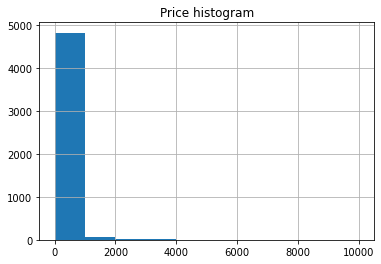

In [13]:
#price histogram
data['price'].hist()
plt.title("Price histogram")
plt.savefig("Price histogram")
plt.show()

The price has right skew distribution
There are several outliers should be reviewed

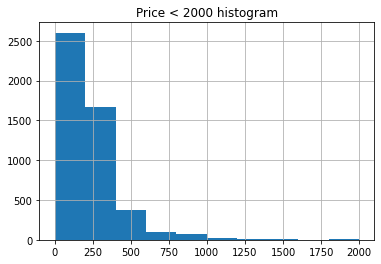

In [14]:
#Price <2000 histogram
data[data['price']<2000]['price'].hist()
plt.title('Price < 2000 histogram')
plt.savefig('Price less than 2000 histogram.png')
plt.show()

* Availability_365

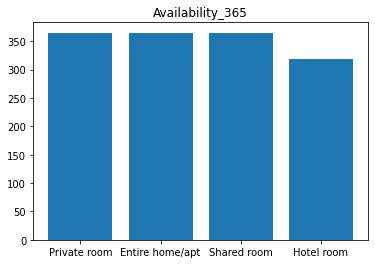

In [15]:
#Availability_365 bar chart
plt.bar(data['room_type'], data['availability_365'])
plt.title('Availability_365')
plt.savefig("Availability_365.png")
plt.show()

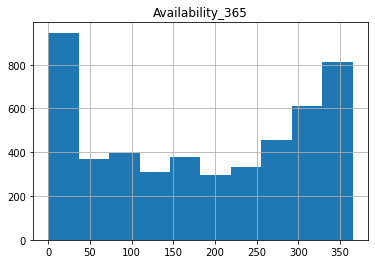

In [16]:
#Availability_365 histogram
data[['room_type','availability_365']].hist()
plt.title('Availability_365')
plt.savefig("Availability_365_hist.png")
plt.show()

In [17]:
data[data['room_type']=='Entire home/apt']['availability_365'].max()

365

In [18]:
data[data['room_type']=='Private room']['availability_365'].max()

365

* reviews_per_month

In [19]:
#Replace NA in column reviews_per_month by 0
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
data['reviews_per_month'].isna().sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1120\446634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews_per_month'] = data['reviews_per_month'].fillna(0)


0

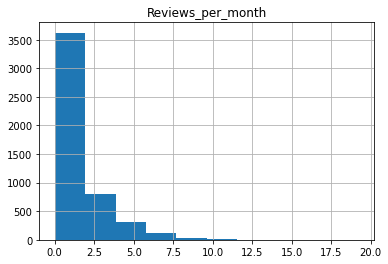

In [20]:
#Reviews_per_month histogram
data['reviews_per_month'].hist()
plt.title("Reviews_per_month")
plt.savefig("Reviews_per_month.png")
plt.show()

* Calculated_host_listings_count

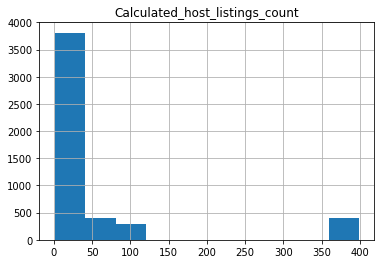

In [21]:
#calculated_host_listings_count histogram
data['calculated_host_listings_count'].hist()
plt.title("Calculated_host_listings_count")
plt.savefig("Calculated_host_listings_count")
plt.show()

In [22]:
data['calculated_host_listings_count'].max()

399

In [23]:
data['calculated_host_listings_count'].min()

1

In [24]:
data['calculated_host_listings_count'].mean()

49.12115031613298

3.2. Categorical variables

* room_type

In [25]:
#Check missing valuable for room_type
data['room_type'].isnull().sum()

0

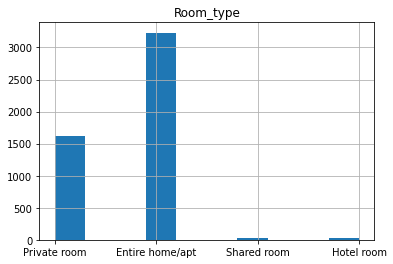

In [26]:
#Room_type histogram 
data['room_type'].hist()
plt.title("Room_type")
plt.savefig("Room_type.png")
plt.show()

From category to dummy variable

Almost all of the room types in the listing are private rooms and entire homes/apts. I applied on-hot coding to handle this categorical variable, which is performed by using the get_dummies function to transform into dummy variable.

In [27]:
# Convert category variables into dummy variables
dummies = pd.get_dummies(data['room_type'])
dummies.head()

,Entire home/apt,Hotel room,Private room,Shared room
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [28]:
data = pd.concat([data, dummies], axis = 1)
data.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Entire home/apt,Hotel room,Private room,Shared room
0,Private room,60,91,13,0.17,2,255,0,0,0,1,0
1,Private room,104,2,144,3.60,3,85,57,0,0,1,0
2,Private room,63,30,210,2.50,2,154,3,0,0,1,0
3,Private room,87,3,21,0.45,1,61,16,0,0,1,0
4,Private room,90,2,128,1.78,2,226,12,0,0,1,0


In [29]:
data.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Entire home/apt,Hotel room,Private room,Shared room
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,251.839690,28.758107,46.581277,1.327532,49.121150,184.431165,12.123802,0.658780,0.004895,0.330818,0.005507
std,377.160569,39.596102,86.857651,1.880372,107.532512,126.282138,22.018231,0.474167,0.069800,0.470556,0.074011
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,2.000000,1.000000,0.030000,2.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,188.000000,10.000000,9.000000,0.510000,5.000000,189.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,289.000000,32.000000,53.000000,2.000000,36.000000,304.000000,15.000000,1.000000,0.000000,1.000000,0.000000
max,10000.000000,730.000000,1071.000000,19.270000,399.000000,365.000000,263.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
data.shape

(4903, 12)

3.3. Detect and remove outliers with Isolation Forest

In [31]:
#import library
from sklearn.ensemble import IsolationForest
from matplotlib import pyplot

In [32]:
#List columns of dataset
data.columns

Index(['room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room'],
      dtype='object')

In [33]:
# create X matrix
Xcols = [ 'price','minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room']
X = data[Xcols]
X.shape

(4903, 11)

In [34]:
X.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Entire home/apt,Hotel room,Private room,Shared room
0,60,91,13,0.17,2,255,0,0,0,1,0
1,104,2,144,3.60,3,85,57,0,0,1,0
2,63,30,210,2.50,2,154,3,0,0,1,0
3,87,3,21,0.45,1,61,16,0,0,1,0
4,90,2,128,1.78,2,226,12,0,0,1,0


In [35]:
Y = data['price']
Y.shape

(4903,)

In [36]:
Y.head()

0     60
1    104
2     63
3     87
4     90
Name: price, dtype: int64

In [37]:
# define model
iforest = IsolationForest(n_jobs = -1, contamination=0.05, random_state=333)
# fit and predict
pred= iforest.fit_predict(X)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [38]:
# add the scores and the labels to the original data to detect outliers
data['scores'] = iforest.decision_function(X)
data['anomaly_label'] = pred

In [39]:
# 5% of outliers detected
gb = pd.DataFrame((data.groupby(by='anomaly_label').count()['price']/data.shape[0]))*100
gb.columns = ['%']
round(gb,2)

,%
anomaly_label,
-1,5.02
1,94.98


In [40]:
# take a look into outliers
outliers = data[data.anomaly_label==-1]
outliers.shape

(246, 14)

In [41]:
outliers.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Entire home/apt,Hotel room,Private room,Shared room,scores,anomaly_label
10,Entire home/apt,120,1,531,13.63,1,77,152,1,0,0,0,-0.121296,-1
20,Private room,173,1,174,5.27,5,346,116,0,0,1,0,-0.079382,-1
24,Private room,50,1,190,2.59,1,291,93,0,0,1,0,-0.024091,-1
25,Private room,131,1,1071,9.03,5,313,102,0,0,1,0,-0.137516,-1
26,Private room,41,1,310,4.17,5,224,38,0,0,1,0,-0.007376,-1


In [42]:
outliers.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Entire home/apt,Hotel room,Private room,Shared room,scores,anomaly_label
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0
mean,468.105691,17.898374,232.313008,5.059146,22.589431,161.191057,56.914634,0.349593,0.060976,0.479675,0.109756,-0.043171,-1.0
std,1190.985747,56.416471,211.509761,3.464733,68.067060,115.624798,48.600462,0.477814,0.239773,0.500605,0.313223,0.040640,0.0
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.193068,-1.0
25%,88.000000,1.000000,73.000000,2.907500,1.250000,57.250000,2.000000,0.000000,0.000000,0.000000,0.000000,-0.064228,-1.0
50%,134.500000,1.000000,182.500000,5.265000,4.000000,153.500000,66.000000,0.000000,0.000000,0.000000,0.000000,-0.027981,-1.0
75%,300.500000,4.500000,355.750000,6.885000,13.000000,272.000000,88.000000,1.000000,0.000000,1.000000,0.000000,-0.012380,-1.0
max,10000.000000,730.000000,1071.000000,19.270000,399.000000,365.000000,263.000000,1.000000,1.000000,1.000000,1.000000,-0.000010,-1.0


In [43]:
#Remove outliers from dataset
data = data[data.anomaly_label==1]

In [44]:
data.shape

(4657, 14)

In [45]:
data.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Entire home/apt,Hotel room,Private room,Shared room,scores,anomaly_label
0,Private room,60,91,13,0.17,2,255,0,0,0,1,0,0.098648,1
1,Private room,104,2,144,3.60,3,85,57,0,0,1,0,0.032815,1
2,Private room,63,30,210,2.50,2,154,3,0,0,1,0,0.028351,1
3,Private room,87,3,21,0.45,1,61,16,0,0,1,0,0.105723,1
4,Private room,90,2,128,1.78,2,226,12,0,0,1,0,0.088809,1


In [46]:
data.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Entire home/apt,Hotel room,Private room,Shared room,scores,anomaly_label
count,4657.000000,4657.000000,4657.000000,4657.000000,4657.000000,4657.000000,4657.000000,4657.000000,4657.000000,4657.000000,4657.0,4657.000000,4657.0
mean,240.415718,29.331759,36.770238,1.130414,50.522654,185.658793,9.757784,0.675113,0.001933,0.322955,0.0,0.097116,1.0
std,269.304901,38.427176,60.579883,1.521957,109.046927,126.713138,16.568941,0.468383,0.043923,0.467656,0.0,0.037246,0.0
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000094,1.0
25%,100.000000,2.000000,1.000000,0.020000,2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.074848,1.0
50%,190.000000,15.000000,8.000000,0.450000,6.000000,191.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.100614,1.0
75%,288.000000,32.000000,45.000000,1.770000,36.000000,306.000000,13.000000,1.000000,0.000000,1.000000,0.0,0.124664,1.0
max,5000.000000,600.000000,465.000000,16.910000,399.000000,365.000000,97.000000,1.000000,1.000000,1.000000,0.0,0.163787,1.0


In [47]:
# save this dataset to answer the first question lately
data.to_csv('C:/Users/LENOVO/Desktop/0.FPT/Udacity/Boston_data_clean.csv', index=False)

Section 4: Modelling and Evaluate the results 

4.1. Is there any relationship between room_type and price? 

In [48]:
#List all unique value of room_type
data['room_type'].value_counts()

Entire home/apt    3144
Private room       1504
Hotel room            9
Name: room_type, dtype: int64

In [49]:
#pyplot.scatter(data[data['room_type']=='Private room']['room_type'], data[data['room_type']=='Private room']['price'])
#data[data['room_type']=='Private room']['room_type']

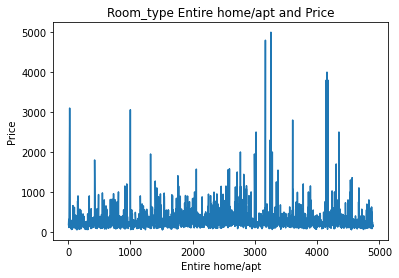

In [50]:
#Plot relationship between Entire home/ apt and Price
plt.plot( data[data['room_type'] =='Entire home/apt']['price'])
plt.title("Room_type Entire home/apt and Price")
plt.xlabel("Entire home/apt")
plt.ylabel("Price")
plt.savefig('Room_type Entire home apt and Price')
plt.show()

To address this question, I used scatter plot chart to visualize and investigate the relationship between Entire home and price. 

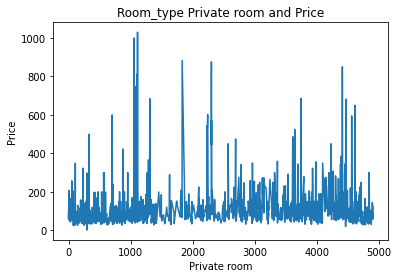

In [51]:
#Plot relationship between Entire home/ apt and Price
plt.plot( data[data['room_type'] =='Private room']['price'])
plt.title("Room_type Private room and Price")
plt.xlabel("Private room")
plt.ylabel("Price")
plt.savefig('Room_type Private room and Price')
plt.show()

To address this question, I used scatter plot chart to visualize and investigate the relationship between Private room and price. 

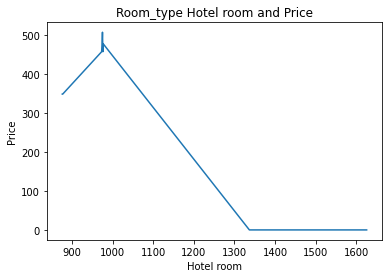

In [52]:
#Plot relationship between Entire home/ apt and Price
plt.plot( data[data['room_type'] =='Hotel room']['price'])
plt.title("Room_type Hotel room and Price")
plt.xlabel("Hotel room")
plt.ylabel("Price")
plt.savefig('Room_type Hotel room and Price')
plt.show()

To address this question, I used scatter plot chart to visualize and investigate the relationship between Hotel room and price. 

In [53]:
data[data['room_type']=='Hotel room']['price']

876     349
877     349
973     458
974     478
975     508
976     458
977     478
1337      0
1626      0
Name: price, dtype: int64

Conclusion:
There is no clear relationship between the room types, which are private rooms and entire homes/apts, and the price.
Apart from Private room and Entire room, there is clear relationship between hotel room and price. 


4.2. Which is the most expensive room_type?

In [54]:
price_room_type = data[['price','room_type']]

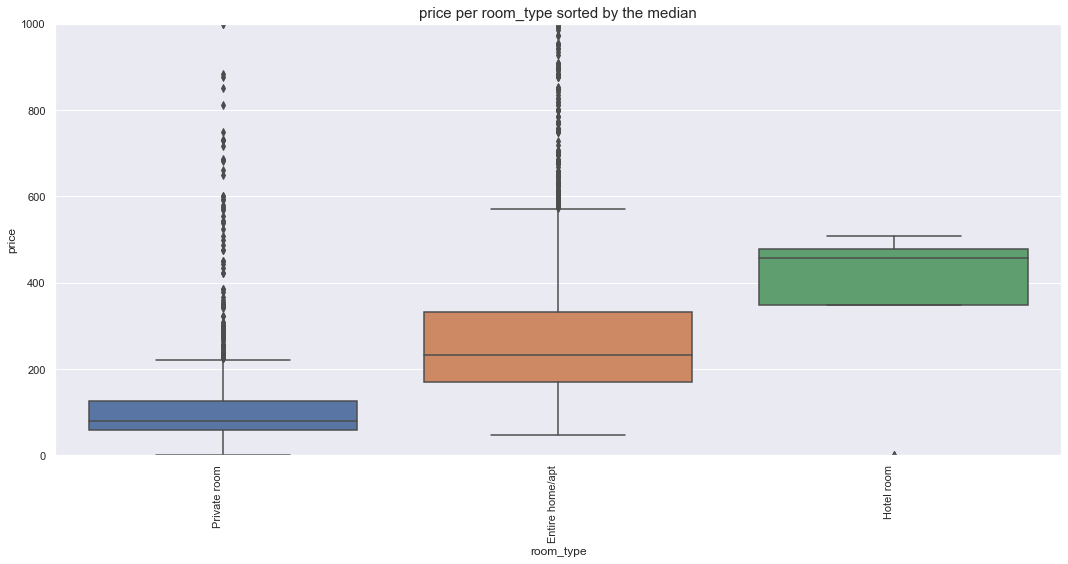

In [55]:
# boxplot price per room_type sorted by the median
grouped = price_room_type \
    .groupby(['room_type']) \
    .median() \
    .sort_values(by='price')

sns.set(rc={'figure.figsize':(15,8)})
bp = sns.boxplot(x=price_room_type['room_type'], y=price_room_type['price'], order=grouped.index)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.ylim(0,1000)
plt.title('price per room_type sorted by the median', fontsize=15)
plt.tight_layout()
plt.savefig('boxplot_price_room_type.png')

In [56]:
price_room_type[price_room_type['room_type']=='Entire home/apt']['price'].max()

5000

In [57]:
price_room_type[price_room_type['room_type']=='Entire home/apt']['price'].mean()

301.7245547073791

In [58]:
price_room_type[price_room_type['room_type']=='Entire home/apt']['price'].median()

232.0

Conclusion:
It is possible to see that there are outliers in all neighborhoods, but also a clear trend, with the majority of the data point concentrated near the medians and a ranking of the different neighborhoods, from the cheapest, Private room, to the most expensive, Hotel room

4.3. What are the factors impact price of Boston Airbnb?

In [59]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

RMSE test set: 111.221
RMSE train set: 79.484


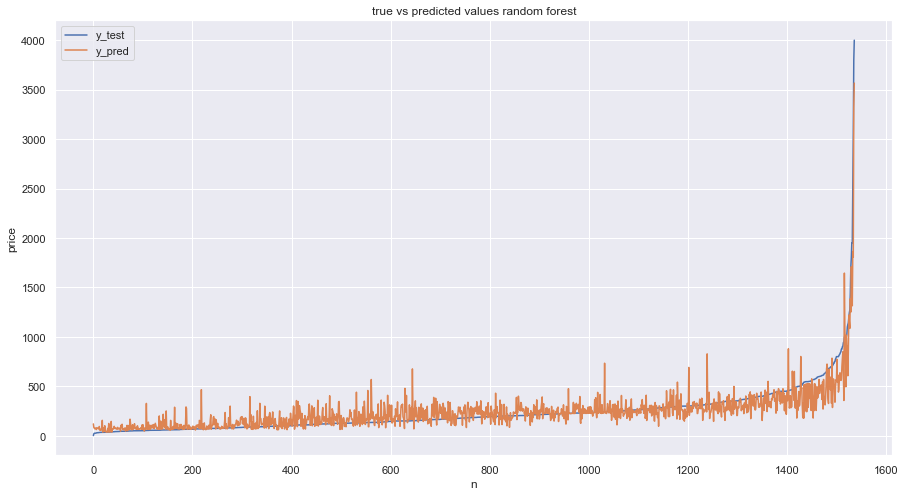

In [60]:
# prepare y and X
y = data['price']
X = data.drop(['price','room_type'], axis=1)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=333)

# create the model, fit and predict
rf = RandomForestRegressor(n_estimators = 500, max_depth = 10, random_state=333)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# evaluate test set
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print('RMSE test set:', round(rmse_test,3))

# check the error on the train set
y_pred_train = rf.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('RMSE train set:', round(rmse_train,3))

# prepare data for plot
d = {'y_test': y_test.values, 'y_pred': y_pred}
df = pd.DataFrame(d)
df = df.sort_values('y_test')
df = df.reset_index(drop=True)

# plot true (test) vs predicted values
df.plot()
plt.ylabel('price')
plt.xlabel('n')
plt.title('true vs predicted values random forest')
plt.savefig('Price_pred.png', bbox_inches='tight')
plt.show()

In [61]:
#Find feature importance
feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  
                                   columns=['importance']).sort_values('importance', ascending=False)

In [62]:
feature_importances.head()

,importance
scores,0.340773
reviews_per_month,0.149917
minimum_nights,0.144683
calculated_host_listings_count,0.100908
availability_365,0.074963


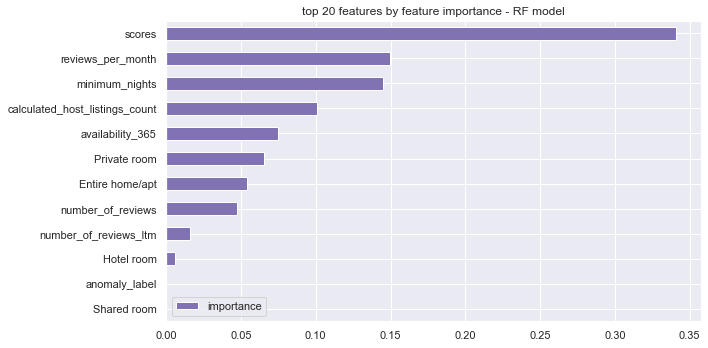

In [63]:
feature_importances.sort_values(by='importance', ascending=True).tail(20).plot.barh(color='m', figsize=(10,5))
plt.title('top 20 features by feature importance - RF model')
plt.tight_layout()
plt.savefig('Top_features.png', bbox_inches='tight')
plt.show()

Conclusion: 
The five most important price-influencing features are reviews_per_month, minimum nights, calculated host listings count, availability 365, and room type